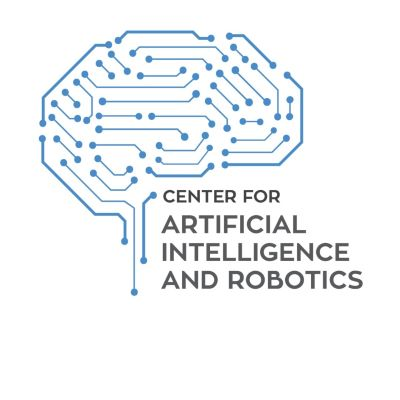

# Logistic Regression Project 

<div style="direction:rtl">
خب، خب، در این پروژه قصد داریم با کار روی دیتاست یک شرکت تبلیغاتی، این که کاربر روی تبلیغی که به او نمایش داده شده کلیک می کند یا خیر را پیش بینی کنیم.

## Nima Ershadi

## Import Libraries

<div style="direction:rtl">
کتابخانه های مورد نیاز را ایمپورت کنید.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

<div style="direction:rtl">
دیتاست مورد نظر را فرخوانی کنید و نگاه خلاصه ای به آن بیندازید و همچنین اطلاعات کلی و آماری آن را نمایش دهید.

In [6]:
Advertising = pd.read_csv('advertising-dataset.csv')

In [4]:
Advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
Advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
Advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis (EDA)

<div style="direction:rtl">
حالا کمی در دیتاست گشت و گذار کنیم تا ببینیم به چه اطلاعاتی دست پیدا می کنیم.

<div style="direction:rtl">
برای شروع، نمودار توزیع آماری را بر حسب سن رسم می کنیم.

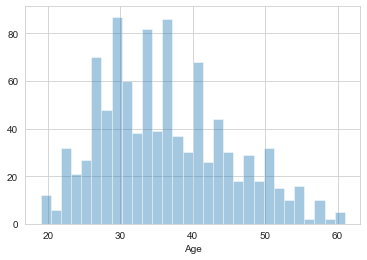

In [24]:
sns.distplot(Advertising["Age"],bins= 30,kde=False)

(array([12.,  6., 32., 21., 27., 70., 48., 87., 60., 38., 82., 39., 86.,
        37., 30., 68., 26., 44., 30., 18., 29., 18., 32., 15., 10., 16.,
         2., 10.,  2.,  5.]),
 array([19. , 20.4, 21.8, 23.2, 24.6, 26. , 27.4, 28.8, 30.2, 31.6, 33. ,
        34.4, 35.8, 37.2, 38.6, 40. , 41.4, 42.8, 44.2, 45.6, 47. , 48.4,
        49.8, 51.2, 52.6, 54. , 55.4, 56.8, 58.2, 59.6, 61. ]),
 <a list of 30 Patch objects>)

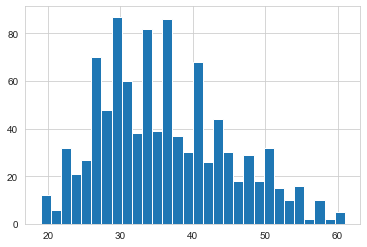

In [22]:
sns.set_style('whitegrid')
plt.hist(Advertising["Age"],bins= 30)

Text(0.5, 0, 'Age')

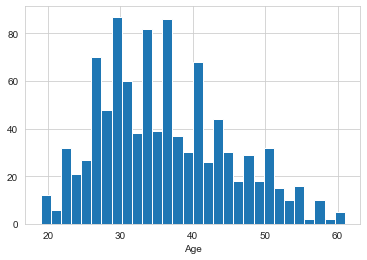

<div style="direction:rtl">
جوینت پلات درآمد بر حسب سن را رسم می کنیم.

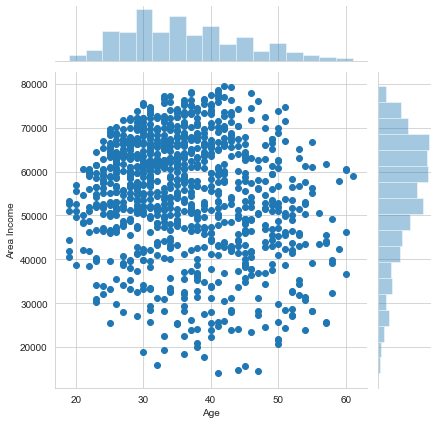

In [23]:
sns.jointplot(x= 'Age'  ,y= 'Area Income', data= Advertising)

<div style="direction:rtl">
KDE پلات میزان وقت گذاشته شده روی سایت تبلیغ بر حسب سن را رسم می کنیم.

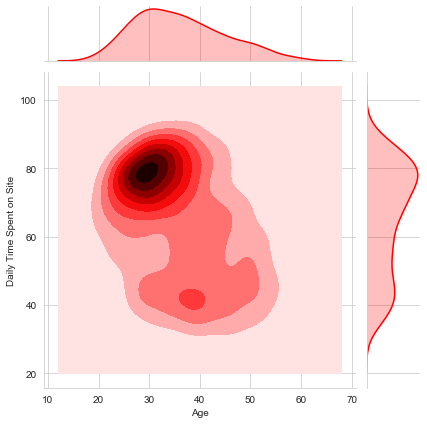

In [32]:
sns.jointplot(x= 'Age'  ,y= 'Daily Time Spent on Site', data= Advertising , kind='kde',color='r')

<div style="direction:rtl">
جوینت پلات میزان استفاده از اینترنت بر حسب میزان وقت گذاشته شده روی سایت تبلیغ را رسم می کنیم.

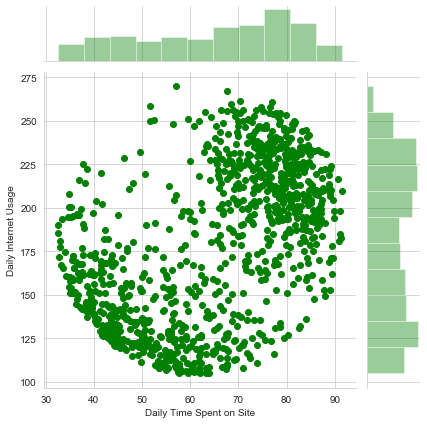

In [33]:
sns.jointplot(x= 'Daily Time Spent on Site'  ,y= 'Daily Internet Usage', data= Advertising ,color='g')

<div style="direction:rtl">
در نهایت یک Pain Plot کلی برای دیتاست، با مشخص کردن تفاوت کسانی که روی تبلیغ کلیک کرده اند و نکرده اند را رسم کنید.

C:\Users\sarayetel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sarayetel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


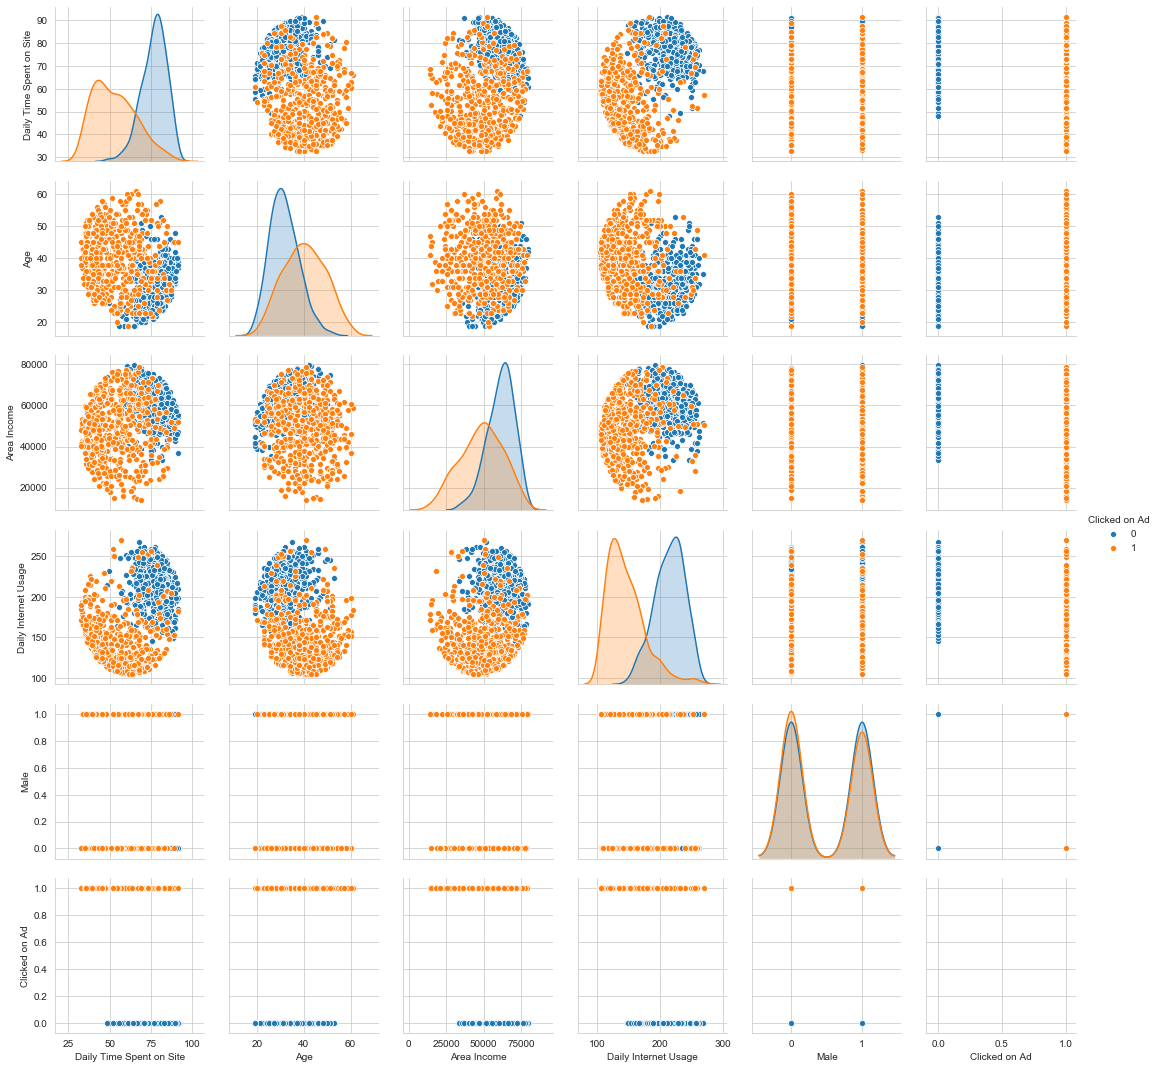

In [37]:
sns.pairplot(Advertising,hue = 'Clicked on Ad')

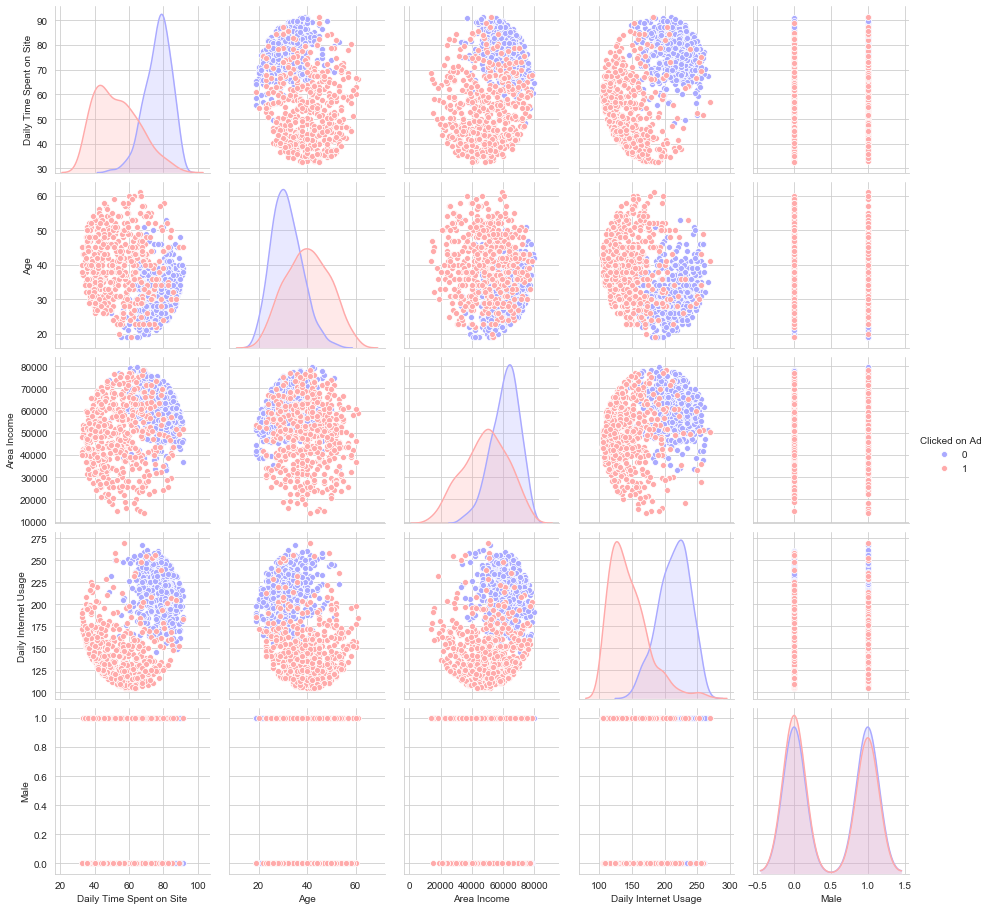

<div style="direction:rtl">
سعی کنید نتایج بالا را در چند خط تحلیل کنید :

<div style="direction:rtl">
تحلیل :

## Adding more Data

In [7]:
Advertising['datetime'] = pd.to_datetime(Advertising['Timestamp'])

In [12]:
Advertising['Hour'] = Advertising['datetime'].apply(lambda x : x.hour)
Advertising['Month'] = Advertising['datetime'].apply(lambda x : x.month)
Advertising['DOF'] = Advertising['datetime'].apply(lambda x : x.dayofweek)
Advertising['year'] = Advertising['datetime'].apply(lambda x : x.year)

In [13]:
Advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,datetime,Hour,Month,DOF,year
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27 00:53:11,0,3,6,2016
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04 01:39:02,1,4,0,2016
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13 20:35:42,20,3,6,2016
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10 02:31:19,2,1,6,2016
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03 03:36:18,3,6,4,2016


In [ ]:
#The "city" and "Ad Topic Line" seems good data, but I don't have any time to analyze them right now

# Logistic Regression

<div style="direction:rtl">
پس از ایمپورت متد مربوطه، داده ها را به دو بخش فیچر و لیبل تقسیم کنید و سپس آن ها را به دو بخش ترین و تست تقسیم نمایید.

In [29]:
from sklearn.model_selection import train_test_split

In [43]:
x = Advertising.drop(['Clicked on Ad',"City","Ad Topic Line",'Country','Timestamp','datetime'] , axis=1)
y = Advertising['Clicked on Ad']
x.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hour,Month,DOF,year
0,68.95,35,61833.90,256.09,0,0,3,6,2016
1,80.23,31,68441.85,193.77,1,1,4,0,2016
2,69.47,26,59785.94,236.50,0,20,3,6,2016
3,74.15,29,54806.18,245.89,1,2,1,6,2016
4,68.37,35,73889.99,225.58,0,3,6,4,2016


In [44]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size= 0.3,random_state =101)

<div style="direction:rtl">
حالا کلاس رگرسیون لاجستیک را بارگزاری نمایید و یک مدل از آن نوع بسازید و با داده های ترین آموزش دهید.

In [26]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmod = LogisticRegression()

In [45]:
logmod.fit(xTrain,yTrain)

C:\Users\sarayetel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations

<div style="direction:rtl">
حالا به کمک مدلی که آموزش داده اید، برای داده های تست پیش بینی کنید که کدام یک روی تبلیغ ها کلیک می کنند.

In [50]:
predic = logmod.predict(xTest)

<div style="direction:rtl">
حالا برای مدلی که آموزش داده اید، معیار های ارزیابی همچون Score و Confusion Matrix و Classification Report را بررسی کنید.

In [51]:
logmod.score(xTest,yTest)

0.9733333333333334

0.906060606060606

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
print(confusion_matrix(yTest,predic))

[[154   3]
 [  5 138]]


array([[156,   6],
       [ 25, 143]], dtype=int64)

In [54]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(yTest,predic))
#  my version

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       157
           1       0.98      0.97      0.97       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



<div style="direction:rtl">
    
## سلام پیش گوی اعظم :)
<div style="direction:rtl">    
    
#### حالا دیگه می تونی این مدلو برداری ببری به شرکتا بفروشی تا از قبل از نمایش یه تبلیغ به یه کاربر بتونن پیش بینی کنن روش کلیک می کنه یا نه و خب اگه قراره نکنه نشونش  ندن و با یه تبلیغ دیگه جایگزین کنن.